In [1]:
import Regression_Model as rm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# Format figures.
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
data_edinburgh = rm.pre_process('edinburgh')  # Pre-processing steps for edinburgh data.

Pre-existing master data file found (no new data created).


In [3]:
raw_data_edinburgh, text_data_edinburgh = rm.create_subsets(data_edinburgh)  # Create raw and text datasets.

In [4]:
raw_predictions_edinburgh = rm.predictive_model(raw_data_edinburgh, data_edinburgh)  # Apply raw data to model.

The average root mean squarred error is  0.2912138201092608
The average mean absolute error is  0.21229226598488143
The correlation between the predicted and actual success: is  0.7805324079597747


In [5]:
text_predictions_edinburgh = rm.predictive_model(text_data_edinburgh, data_edinburgh)  # Apply text data to model.

The average root mean squarred error is  0.46572732881406703
The average mean absolute error is  0.3735838195752596
The correlation between the predicted and actual success: is  0.04569160290748346


In [6]:
hybrid_predictions_edinburgh = rm.predictive_model(data_edinburgh, data_edinburgh)  # Apply all data to model.

The average root mean squarred error is  0.29258678364329027
The average mean absolute error is  0.21305554048954506
The correlation between the predicted and actual success: is  0.7776811663471929


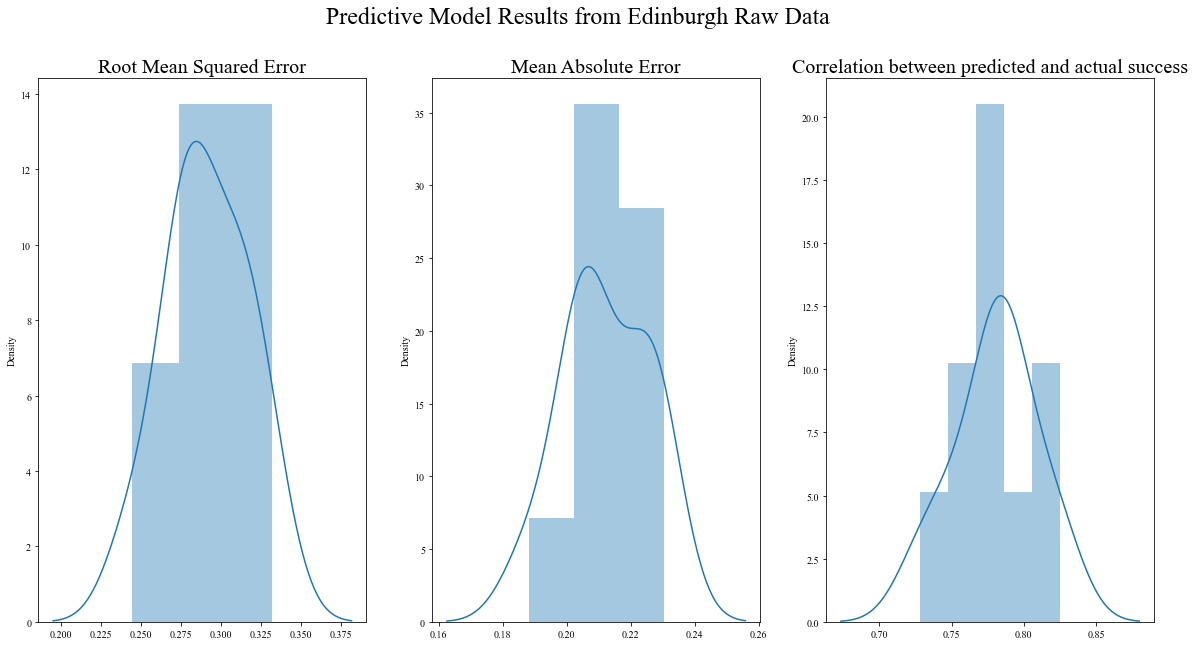

In [7]:
# Plot the distributions of the calculated MSE, MAE and predicted to actual correlation.
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.suptitle('Predictive Model Results from Edinburgh Raw Data', fontsize=24)
sns.distplot(raw_predictions_edinburgh[0],ax=axes[0])
axes[0].set_title("Root Mean Squared Error", fontsize=20)
sns.distplot(raw_predictions_edinburgh[1],ax=axes[1])
axes[1].set_title("Mean Absolute Error", fontsize=20)
sns.distplot(raw_predictions_edinburgh[2],ax=axes[2])
axes[2].set_title("Correlation between predicted and actual success", fontsize=20)
plt.savefig('figures/raw_distributions.pdf')
fig.show()

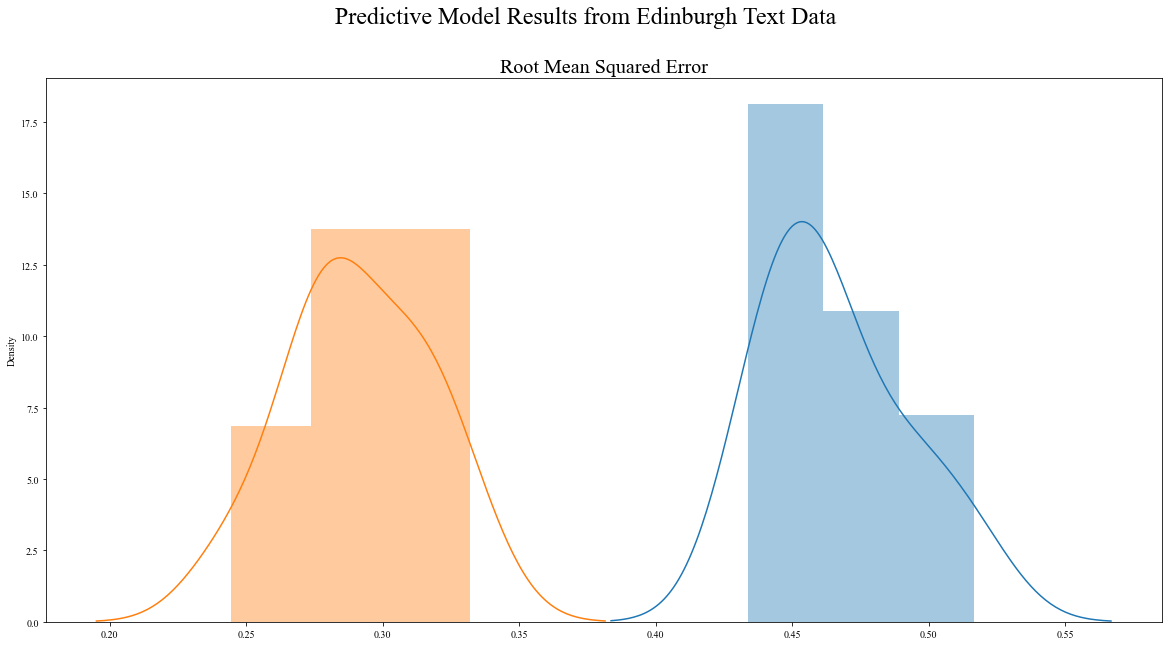

In [8]:
# Plot the distributions of the calculated MSE, MAE and predicted to actual correlation.
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Predictive Model Results from Edinburgh Text Data', fontsize=24)
sns.distplot(text_predictions_edinburgh[0],ax=axes,label='Text')
sns.distplot(raw_predictions_edinburgh[0],ax=axes,label='Raw')
axes.set_title("Root Mean Squared Error", fontsize=20)
# uncomment the following lines to also plot MAE and correlation
# sns.distplot(text_predictions_edinburgh[1],ax=axes[1],label='Text')
# sns.distplot(raw_predictions_edinburgh[1],ax=axes[1],label='Raw')
# axes[1].set_title("Mean Absolute Error", fontsize=20)
# sns.distplot(text_predictions_edinburgh[2],ax=axes[2],label='Text')
# sns.distplot(raw_predictions_edinburgh[2],ax=axes[2],label='Raw')
# plt.legend(fontsize=18)
# axes[2].set_title("Correlation between predicted and actual success", fontsize=20)
plt.savefig('figures/text_distributions.pdf')
fig.show()

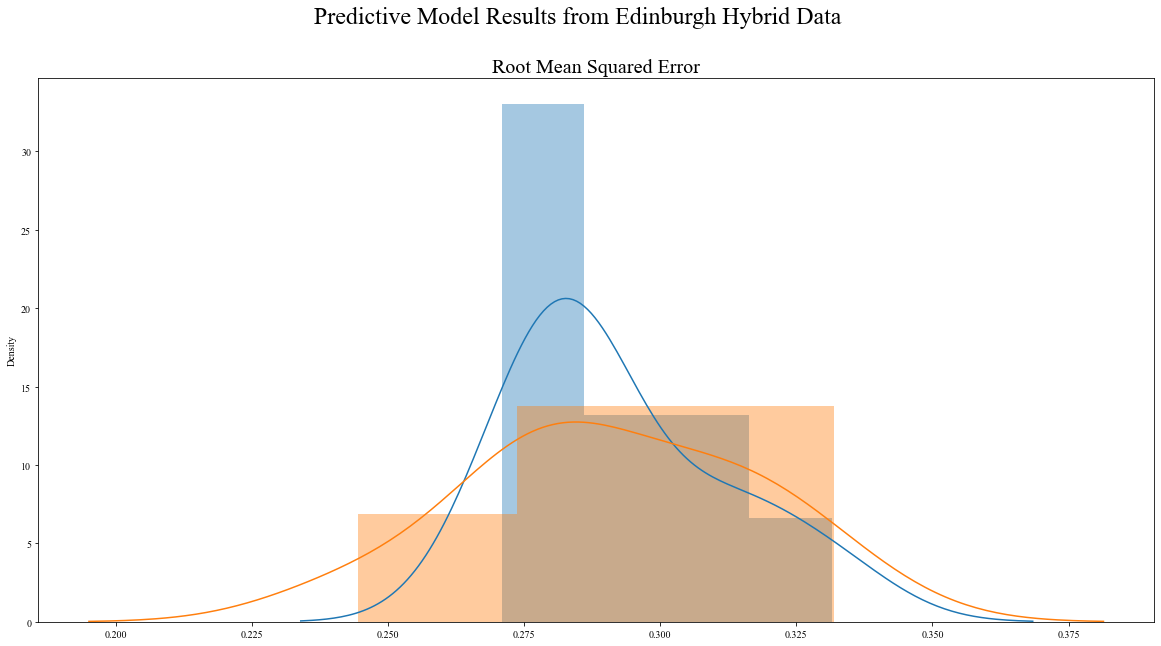

In [9]:
# Plot the distributions of the calculated MSE, MAE and predicted to actual correlation.
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Predictive Model Results from Edinburgh Hybrid Data', fontsize=24)
sns.distplot(hybrid_predictions_edinburgh[0],ax=axes,label='Hybrid')
sns.distplot(raw_predictions_edinburgh[0],ax=axes,label='Raw')
axes.set_title("Root Mean Squared Error", fontsize=20)
# uncomment the following lines to also plot MAE and correlation
# sns.distplot(hybrid_predictions_edinburgh[1],ax=axes[1],label='Hybrid')
# sns.distplot(raw_predictions_edinburgh[1],ax=axes[1],label='Raw')
# axes[1].set_title("Mean Absolute Error", fontsize=20)
# sns.distplot(hybrid_predictions_edinburgh[2],ax=axes[2],label='Hybrid')
# sns.distplot(raw_predictions_edinburgh[2],ax=axes[2],label='Raw')
# plt.legend(fontsize=18)
# axes[2].set_title("Correlation between predicted and actual success", fontsize=20)
plt.savefig('figures/hybrid_distributions.pdf')
fig.show()

In [10]:
# Perform t-test for raw vs text data
stats.ttest_ind(raw_predictions_edinburgh[0],text_predictions_edinburgh[0])

Ttest_indResult(statistic=-14.824584559670559, pvalue=1.5691836089672146e-11)

In [11]:
# Perform t-test for raw vs hybrid data
stats.ttest_ind(raw_predictions_edinburgh[0],hybrid_predictions_edinburgh[0])

Ttest_indResult(statistic=-0.13310681581052167, pvalue=0.8955856983258004)